In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1A

In [37]:
data = pd.DataFrame({
    'Weight': [180, 200, 150, 170, 160, 140],
    'Sweetness': [7, 6, 4, 5, 6, 3],
    'Label': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple', 'Orange']
})
new_fruit = np.array([165, 5.5])

In [38]:
def eucledian_dist(a,b):
    return np.sqrt(np.sum((a-b)**2))

def manhatten_dist(a,b):
    return np.sum(np.abs(a-b))

def minkowski_dist(a, b, p):
    return np.sum(np.abs(a - b) ** p) ** (1/p)
k = 5

In [39]:
def KNN(data):
    distances = []
    for idx,row in data.iterrows():
        weight = np.array([row['Weight'], row['Sweetness']])
        label = row['Label']

        euclidean = eucledian_dist(new_fruit, weight)
        manhattan = manhatten_dist(new_fruit, weight)
        minkowski = minkowski_dist(new_fruit, weight, 3)

        distances.append((euclidean, manhattan, minkowski, label))
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    labels = {}
    for nei in nearest_neighbors:
        label = nei[3]
        labels[label] = labels.get(label,0) + 1

    pred_cnt = max(labels,key = labels.get)
    print(pred_cnt)

    for dist in distances:
        print(f"Euclidean: {dist[0]:.2f}, Manhattan: {dist[1]:.2f}, Minkowski: {dist[2]:.2f}, Label: {dist[3]}")

KNN(data)

Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Orange
Euclidean: 5.02, Manhattan: 5.50, Minkowski: 5.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Apple
Euclidean: 15.07, Manhattan: 16.50, Minkowski: 15.00, Label: Orange
Euclidean: 25.12, Manhattan: 27.50, Minkowski: 25.01, Label: Orange
Euclidean: 35.00, Manhattan: 35.50, Minkowski: 35.00, Label: Apple


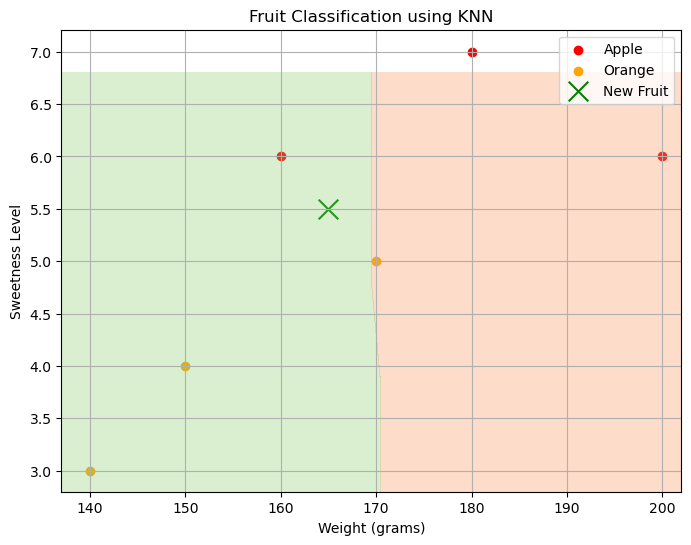

In [40]:
def visual(data):
    plt.figure(figsize=(8, 6))
    for index, row in data.iterrows():
        if row['Label'] == 'Apple':
            plt.scatter(row['Weight'], row['Sweetness'], color='red', label='Apple' if 'Apple' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(row['Weight'], row['Sweetness'], color='orange', label='Orange' if 'Orange' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.scatter(new_fruit[0], new_fruit[1], color='green', marker='x', s=200, label='New Fruit')

    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level')
    plt.title('Fruit Classification using KNN')
    plt.legend()
    plt.grid()    
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
    label_mapping = {'Apple': 0, 'Orange': 1}
    Z = []
    for i in range(len(xx)):
        for j in range(len(xx[0])):
            point = np.array([xx[i][j], yy[i][j]])
            distances = []
            for _, row in data.iterrows():
                weight = np.array([row['Weight'], row['Sweetness']])
                distance = eucledian_dist(point, weight)
                distances.append((distance, row['Label']))
            distances.sort(key=lambda x: x[0])
            nearest_labels = [label for _, label in distances[:k]]
            predicted_label = max(set(nearest_labels), key=nearest_labels.count)
            Z.append(label_mapping[predicted_label]) 

    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn', levels=[-0.5, 0.5, 1.5]) 

    plt.show()

visual(data)

#### 1B

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import LabelEncoder

In [48]:
X = data[['Weight', 'Sweetness']]
y = data['Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y_encoded)

new_fruit = np.array([165, 5.5]).reshape(1, -1)

predicted_label_index = knn.predict(new_fruit)

predicted_label = label_encoder.inverse_transform(predicted_label_index)
print(f"Predicted Label for the new fruit: {predicted_label[0]}")

euclidean_distances = pairwise_distances(new_fruit, X, metric='euclidean')[0]
manhattan_distances = pairwise_distances(new_fruit, X, metric='manhattan')[0]
minkowski_distances = pairwise_distances(new_fruit, X, metric='minkowski', p=3)[0]

print(f"Euclidean Distances: {euclidean_distances}")
print(f"Manhattan Distances: {manhattan_distances}")
print(f"Minkowski Distances (p=3): {minkowski_distances}")

Predicted Label for the new fruit: Orange
Euclidean Distances: [15.07481343 35.00357125 15.07481343  5.02493781  5.02493781 25.12468905]
Manhattan Distances: [16.5 35.5 16.5  5.5  5.5 27.5]
Minkowski Distances (p=3): [15.00499833 35.00003401 15.00499833  5.00166611  5.00166611 25.00833056]


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


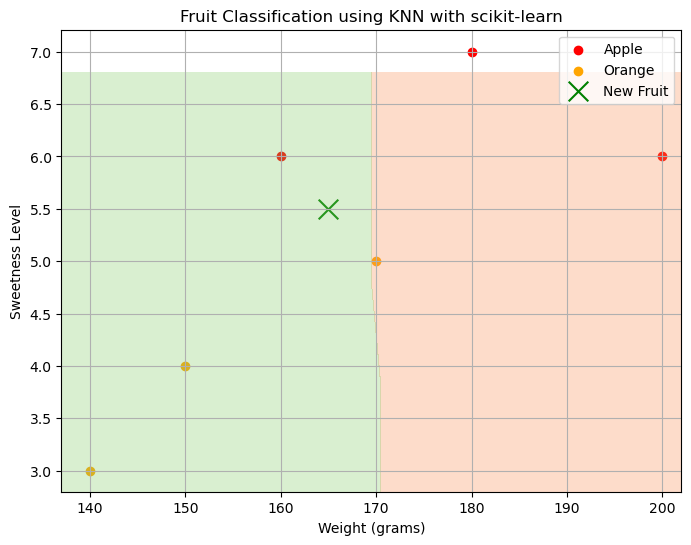

In [49]:
plt.figure(figsize=(8, 6))
colors = {'Apple': 'red', 'Orange': 'orange'}
for index, row in data.iterrows():
    plt.scatter(row['Weight'], row['Sweetness'], color=colors[row['Label']], label=row['Label'] if row['Label'] not in plt.gca().get_legend_handles_labels()[1] else "")
plt.scatter(new_fruit[0][0], new_fruit[0][1], color='green', marker='x', s=200, label='New Fruit')
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = label_encoder.inverse_transform(Z)  # Convert back to original labels
Z = np.array([1 if label == 'Orange' else 0 for label in Z])  # Convert to numeric for contour plotting

plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.3, cmap='RdYlGn', levels=[-0.5, 0.5, 1.5])

plt.xlabel('Weight (grams)')
plt.ylabel('Sweetness Level')
plt.title('Fruit Classification using KNN with scikit-learn')
plt.legend()
plt.grid()
plt.show()


#### 2A


In [52]:
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}
df = pd.DataFrame(data)
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    total = counts.sum()
    ent = -sum((count/total) * np.log2(count/total) for count in counts)
    return ent
initial_entropy = entropy(df['Diagnosis'])
print(f"Initial Entropy: {initial_entropy:.4f}")
def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    feature_values = data[feature].unique()
    
    weighted_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        prob = len(subset) / len(data)
        weighted_entropy += prob * entropy(subset[target])
    
    return total_entropy - weighted_entropy
features = ['Age', 'Blood Pressure', 'Cholesterol']
ig = {feature: information_gain(df, feature, 'Diagnosis') for feature in features}

print("\nInformation Gain:")
for feature, gain in ig.items():
    print(f"{feature}: {gain:.4f}")
root_feature = max(ig, key=ig.get)
print(f"\nRoot Feature: {root_feature}")
class DecisionTree:
    def __init__(self):
        self.tree = {}

    def build_tree(self, data, target):
        if len(np.unique(data[target])) == 1:
            return data[target].iloc[0]
        if len(data.columns) == 1:
            return data[target].mode()[0]
        feature = max(ig, key=ig.get)
        tree = {feature: {}}
        for value in data[feature].unique():
            subset = data[data[feature] == value].drop(columns=[feature])
            tree[feature][value] = self.build_tree(subset, target)
        
        return tree
decision_tree = DecisionTree()
tree = decision_tree.build_tree(df, 'Diagnosis')
print("\nDecision Tree:")
print(tree)
def predict(tree, instance):
    if not isinstance(tree, dict):
        return tree
    feature = next(iter(tree))
    value = instance[feature]
    if value in tree[feature]:
        return predict(tree[feature][value], instance)
    else:
        return None 
new_patient = {'Age': 50, 'Blood Pressure': 'Low', 'Cholesterol': 'Normal'}
prediction = predict(tree, new_patient)
print(f"\nPrediction for the new patient: {prediction}")


Initial Entropy: 1.0000

Information Gain:
Age: 1.0000
Blood Pressure: 1.0000
Cholesterol: 1.0000

Root Feature: Age

Decision Tree:
{'Age': {30: 'Sick', 45: 'Healthy', 50: 'Sick', 35: 'Healthy', 60: 'Sick', 55: 'Healthy', 40: 'Sick', 25: 'Healthy', 65: 'Sick'}}

Prediction for the new patient: Sick


#### 2B

In [54]:
from sklearn.tree import DecisionTreeClassifier, export_text

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']
X_encoded = X.copy()
label_encoders = {}
for column in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X_encoded[column])
    label_encoders[column] = le
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_encoded, y)
tree_rules = export_text(clf, feature_names=list(X_encoded.columns))
print("Decision Tree Rules:\n")
print(tree_rules)
root_node_feature = clf.tree_.feature[0]
root_node_name = list(X_encoded.columns)[root_node_feature]
print(f"Root Feature: {root_node_name}")
new_patient = pd.DataFrame({
    'Age': [50],
    'Blood Pressure': ['Low'],
    'Cholesterol': ['Normal']
})
for column in new_patient.columns:
    new_patient[column] = label_encoders[column].transform(new_patient[column])
prediction = clf.predict(new_patient)
print(f"\nPrediction for the new patient (50 years old, low blood pressure, normal cholesterol): {prediction[0]}")

Decision Tree Rules:

|--- Cholesterol <= 0.50
|   |--- class: Sick
|--- Cholesterol >  0.50
|   |--- class: Healthy

Root Feature: Cholesterol

Prediction for the new patient (50 years old, low blood pressure, normal cholesterol): Healthy
